In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
sample = pd.read_csv("./sample_submission.csv")
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [6]:
train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [7]:
train.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381099,381100,Female,51,1,28.0,0,1-2 Year,Yes,44504.0,26.0,71,0
381100,381101,Female,29,1,28.0,0,< 1 Year,Yes,49007.0,124.0,137,0
381101,381102,Female,70,1,28.0,0,> 2 Years,Yes,50904.0,122.0,215,0
381102,381103,Female,25,1,41.0,1,< 1 Year,Yes,2630.0,152.0,102,0
381103,381104,Male,47,1,50.0,0,1-2 Year,Yes,39831.0,26.0,235,0
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
train.info

<bound method DataFrame.info of             id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0

In [10]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
missing_percentage = (train.isnull().sum() / len(train)) * 100
print(missing_percentage)

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64


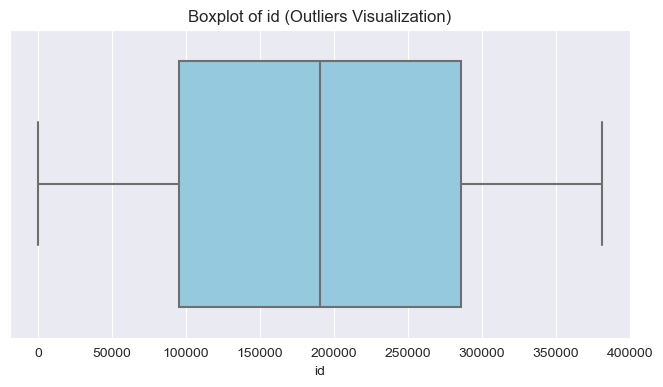

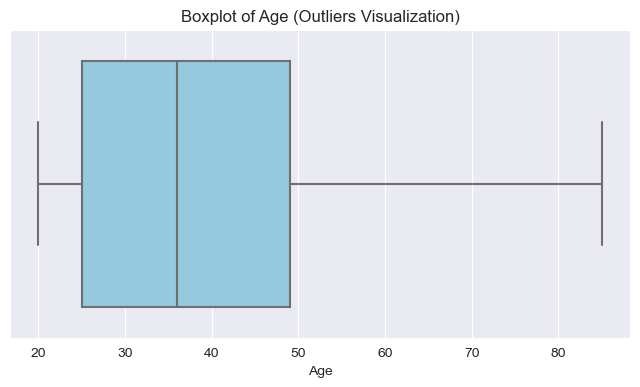

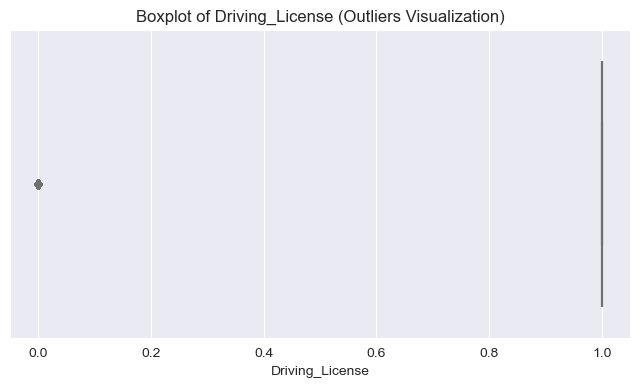

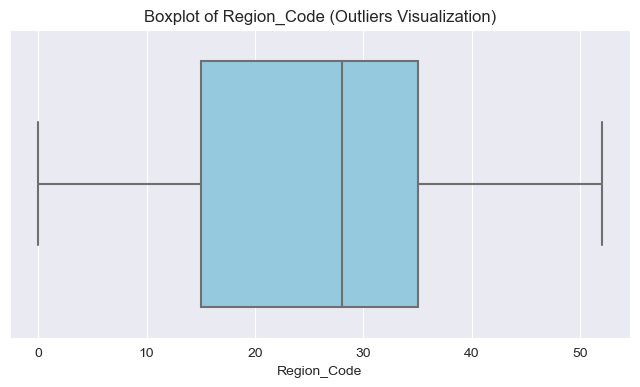

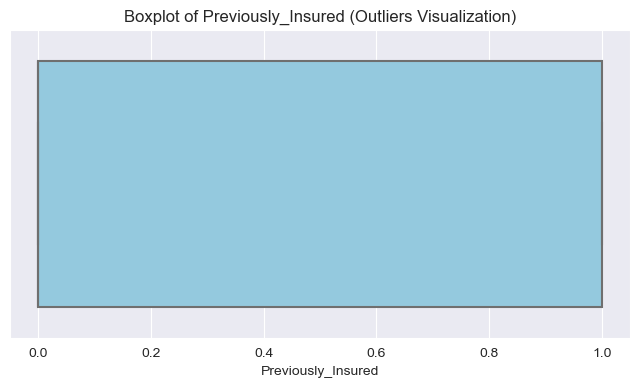

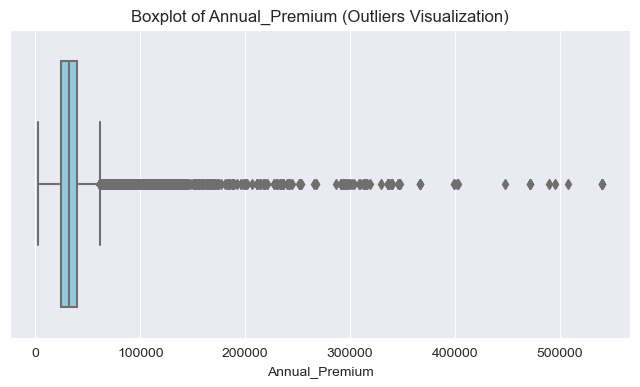

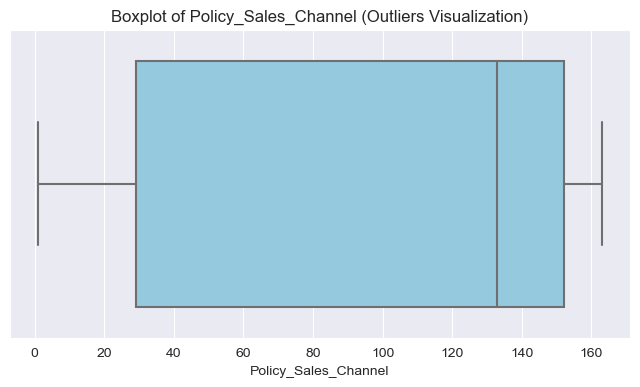

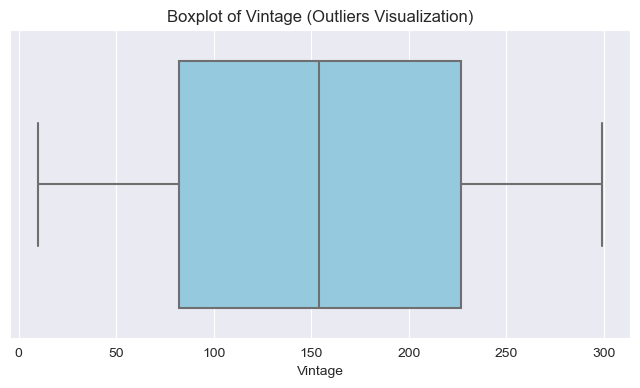

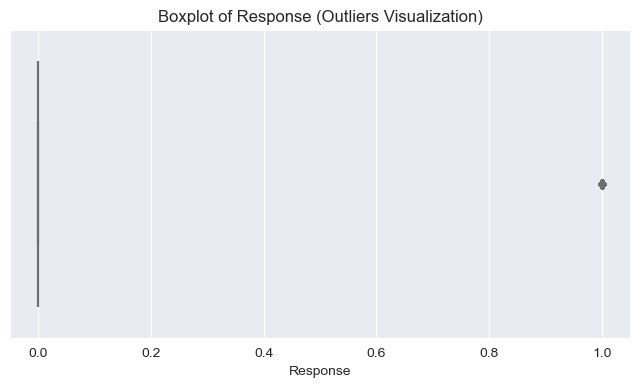

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numerical columns
def plot_outliers(train):
    numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=train[column], color="skyblue")
        plt.title(f"Boxplot of {column} (Outliers Visualization)")
        plt.xlabel(column)
        plt.show()

# Call the function to plot
plot_outliers(train)

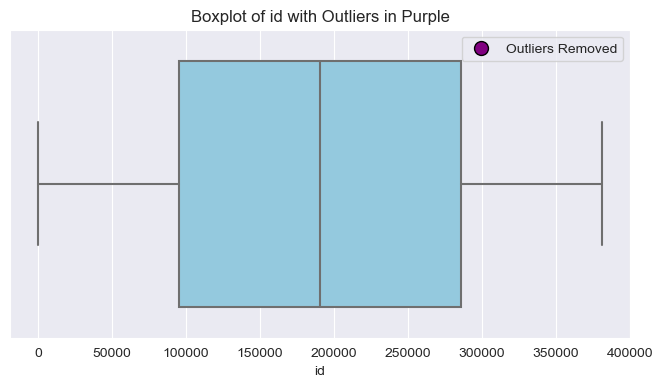

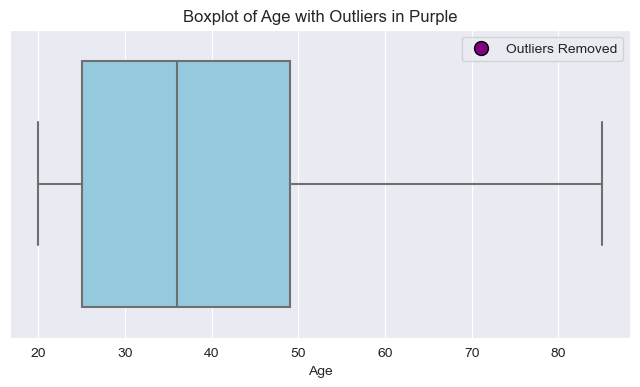

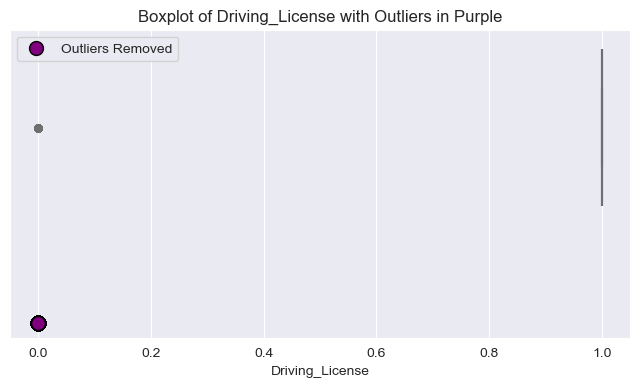

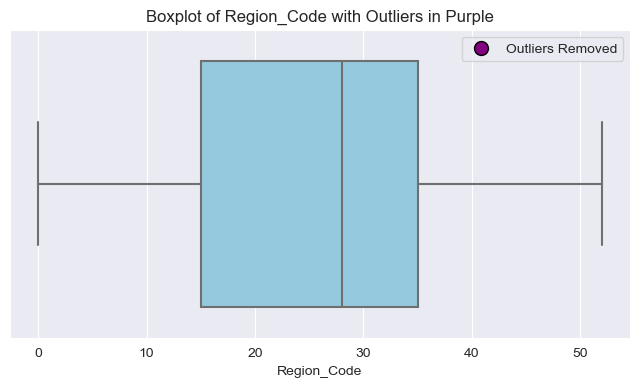

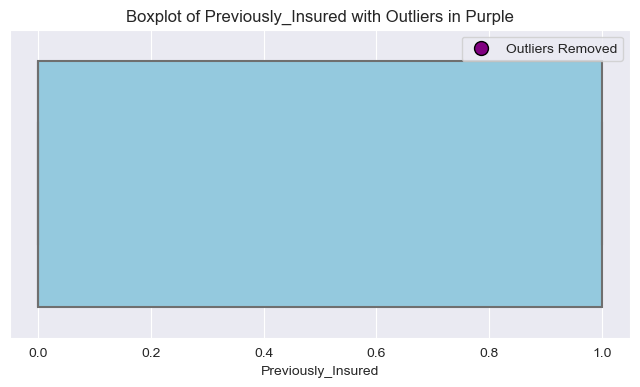

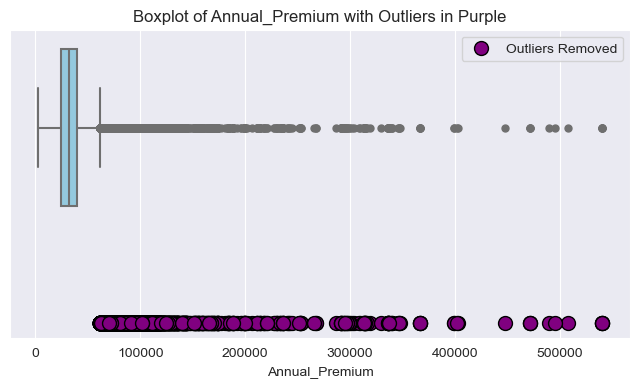

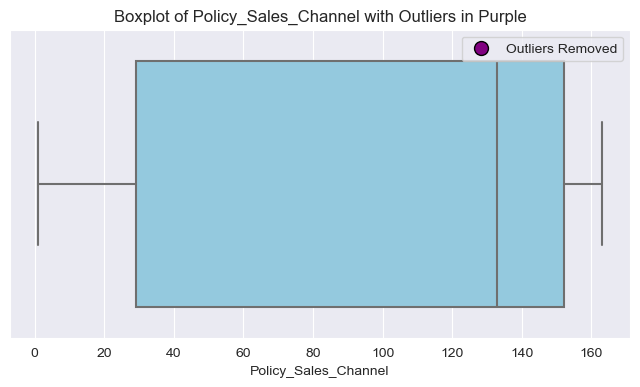

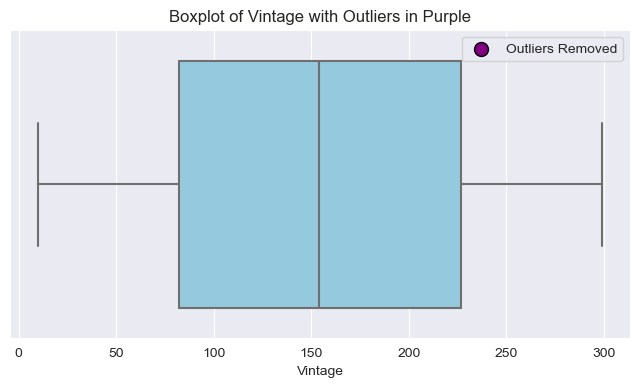

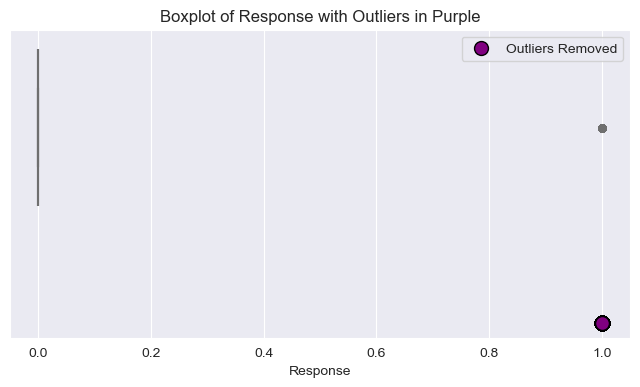

In [14]:
def remove_outliers_iqr(train):
    cleaned_data = train.copy()
    outlier_data = {}
    
    for column in train.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
        outlier_data[column] = outliers
        
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    
    return cleaned_data, outlier_data

cleaned_data, outlier_data = remove_outliers_iqr(train)

def plot_outliers_with_removed(train, outlier_data):
    for column in train.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(8, 4))
        
        # Plot original boxplot without highlighting outliers
        sns.boxplot(x=train[column], color="skyblue", flierprops={'marker': 'o', 'color': 'blue'})
        
        # Highlight the removed outliers in purple
        if column in outlier_data:
            outliers = outlier_data[column]
            plt.scatter(outliers[column], [1] * len(outliers), color="purple", label="Outliers Removed", s=100, edgecolor='black')
        
        plt.title(f"Boxplot of {column} with Outliers in Purple")
        plt.xlabel(column)
        plt.legend()
        plt.show()

plot_outliers_with_removed(train, outlier_data)

In [15]:
train.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [16]:
## knowing all the unique value in the columns

train_unique = train.drop(columns = 'id')

for column in train_unique.columns:
    print(f"{column}: ")
    print("")
    print(train_unique[column].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

In [17]:
train.drop(columns = 'id', inplace = True)
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


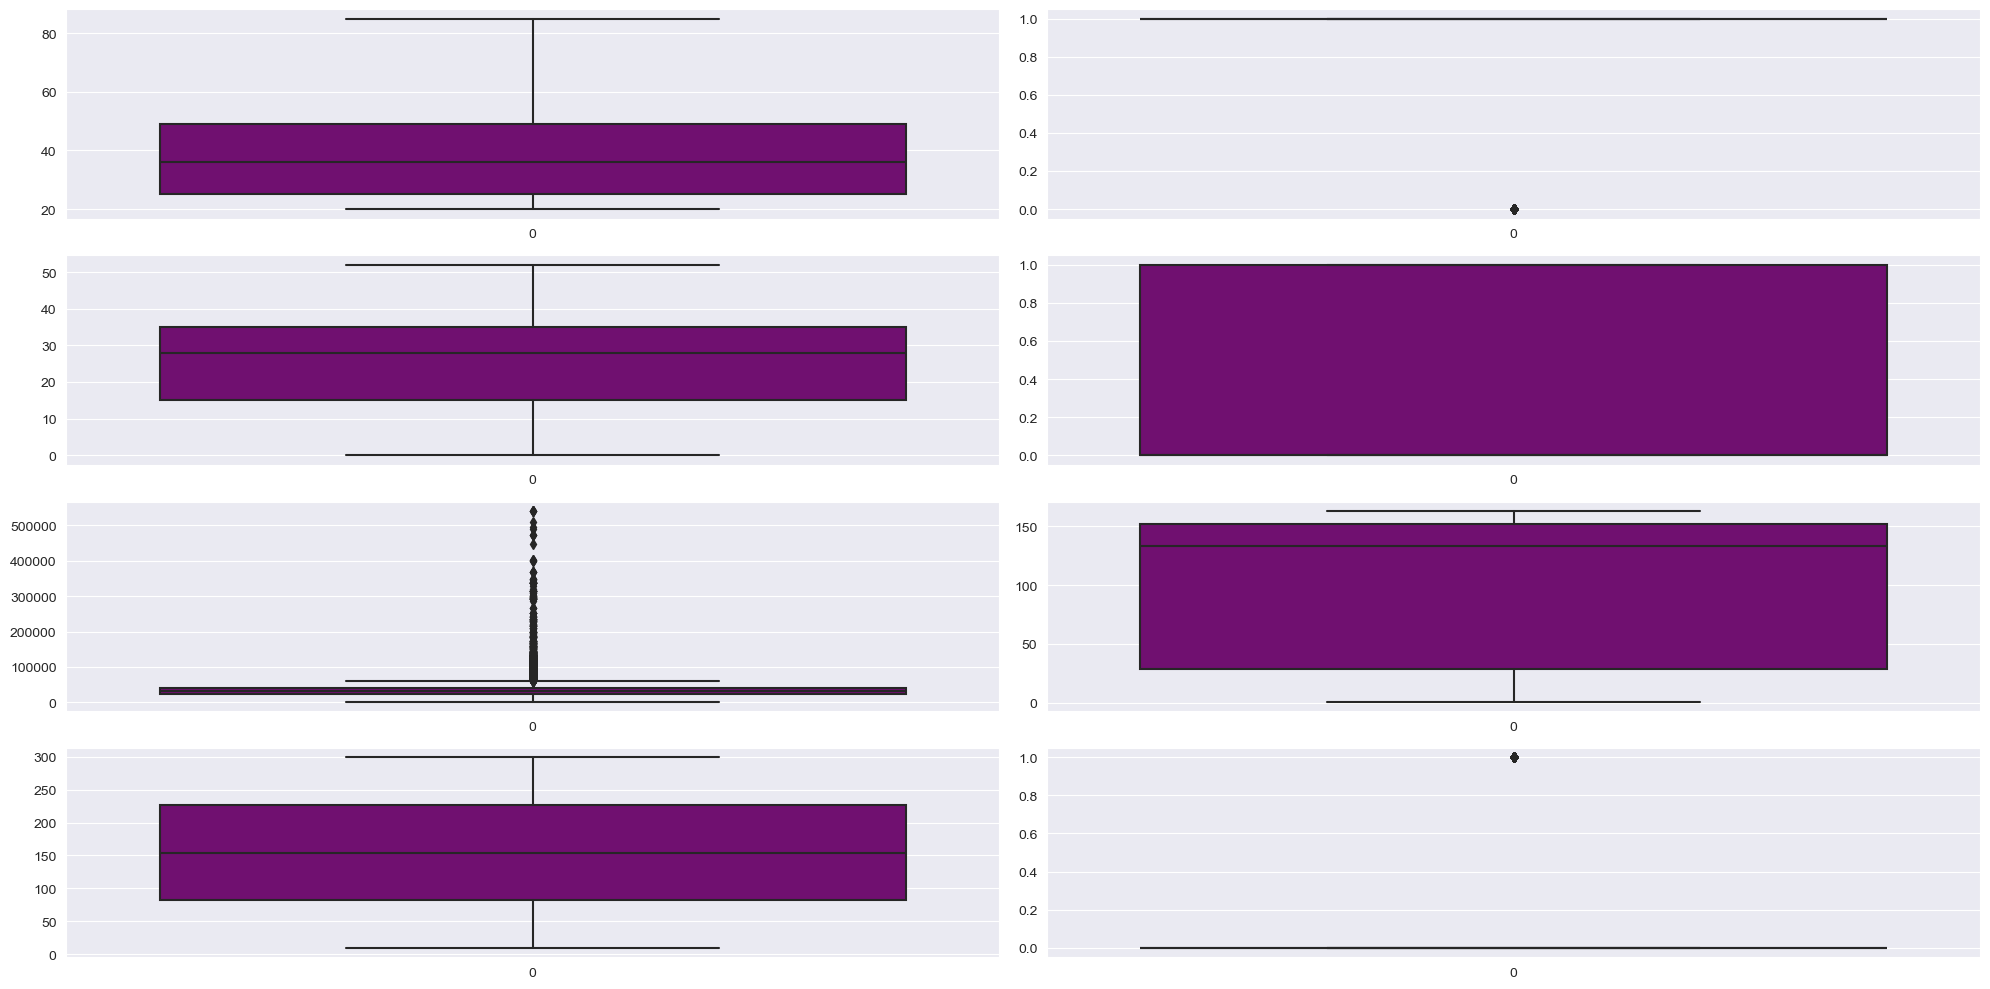

In [18]:
plt.figure(figsize = (20, 10))
x = 1

for column in train.describe().columns:
    plt.subplot(4,2, x)
    sns.boxplot(train[column], color='purple')
    x += 1

plt.tight_layout()
plt.show()

In [19]:
train['Gender'] = train['Gender'].map({'Female':1, 'Male':0})
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [20]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes':1, 'No':0})
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [21]:
train['Vehicle_Age'] = train['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [23]:
train['Gender'].value_counts()

Gender
0    206089
1    175020
Name: count, dtype: int64

In [24]:
pd.crosstab(index = train['Gender'], columns = train['Response'], normalize = 'index')

Response,0,1
Gender,,
0,0.861589,0.138411
1,0.896098,0.103902


In [25]:
pd.crosstab(index = train['Gender'], columns = train['Response'], normalize = 'index')

Response,0,1
Gender,,
0,0.861589,0.138411
1,0.896098,0.103902


In [26]:
pd.crosstab(index = train['Age'], columns = train['Response'], normalize = 'columns').sort_values(1, ascending = False)

Response,0,1
Age,,
44,0.019575,0.038771
43,0.019833,0.038643
45,0.019163,0.038000
46,0.018457,0.036545
42,0.019007,0.035346
...,...,...
81,0.000156,0.000086
82,0.000084,0.000021
83,0.000063,0.000021


AttributeError: 'numpy.int64' object has no attribute 'startswith'

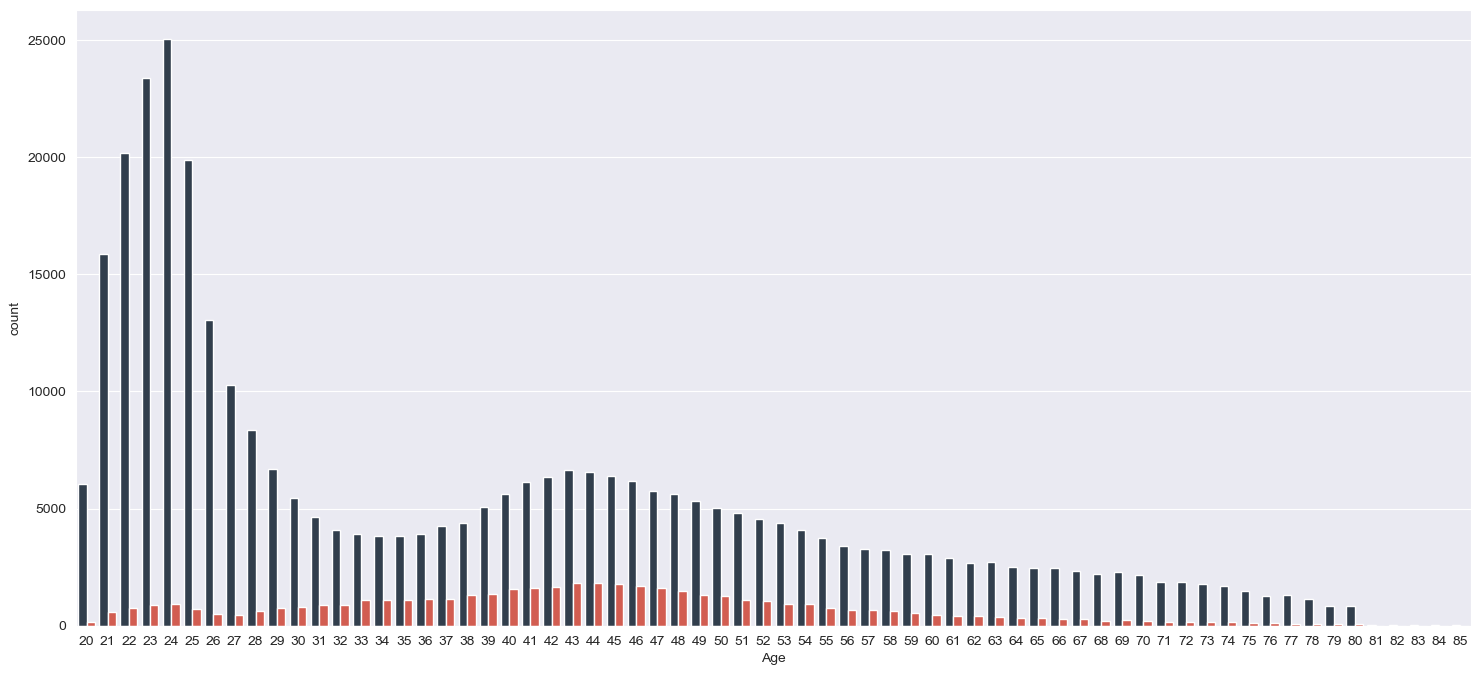

In [27]:
plt.figure(figsize=(18, 8))
custom_palette = ['#2c3e50', '#e74c3c']

sns.countplot(x='Age', hue='Response', data=train, palette=custom_palette)
plt.title('Count of Responses by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Response', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(18, 8))
custom_palette = ['#2c3e50', '#e74c3c']

sns.countplot(x='Gender', hue='Response', data=train, palette=custom_palette)
plt.title('Count of Responses by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Response', fontsize=12)
plt.show()

In [ ]:
train['Driving_License'].value_counts(normalize= True)

In [ ]:
pd.crosstab(index = train['Driving_License'], columns = train['Response'], normalize = 'index')

In [ ]:
pd.crosstab(index = train['Previously_Insured'], columns = train['Response'], normalize = 'index')

In [ ]:
pd.crosstab(index = train['Vehicle_Age'], columns = train['Response'], normalize = 'columns')


In [ ]:
pd.crosstab(index = train['Response'], columns = 'Test', values = train['Annual_Premium'], aggfunc = 'median')

In [ ]:
plt.figure(figsize=(14, 8))
custom_palette = ['#6a0dad', '#9370db', '#dda0dd']

sns.barplot(x='Vehicle_Age', y='Response', hue='Vehicle_Damage', data=train, palette=custom_palette)
plt.title('Response by Vehicle Age and Damage', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.legend(title='Vehicle Damage', fontsize=12)
plt.show()

In [ ]:
sns.barplot(x = train['Previously_Insured'], y = train['Response'])

In [ ]:
plt.figure(figsize=(14, 8))
blackberry_color = '#4B0082'

sns.barplot(x='Response', y='Annual_Premium', data=train, color=blackberry_color)
plt.title('Annual Premium by Response', fontsize=16)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.show()

In [ ]:
train['Response'].value_counts(normalize = True)

In [ ]:
plt.figure(figsize = (20, 12))
sns.heatmap(train.corr(), annot = True)

In [ ]:
correlation = train.corr()
correlation['Response'].sort_values(ascending = False)[1:]

In [30]:
X = train.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y = train['Response']

In [31]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 381109 entries, 0 to 381108
Series name: Response
Non-Null Count   Dtype
--------------   -----
381109 non-null  int64
dtypes: int64(1)
memory usage: 2.9 MB


In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

第一次调参 - AUC: 0.43945391559598246
第二次调参 - AUC: 0.4394547551639623
第三次调参 - AUC: 0.43945477948041284


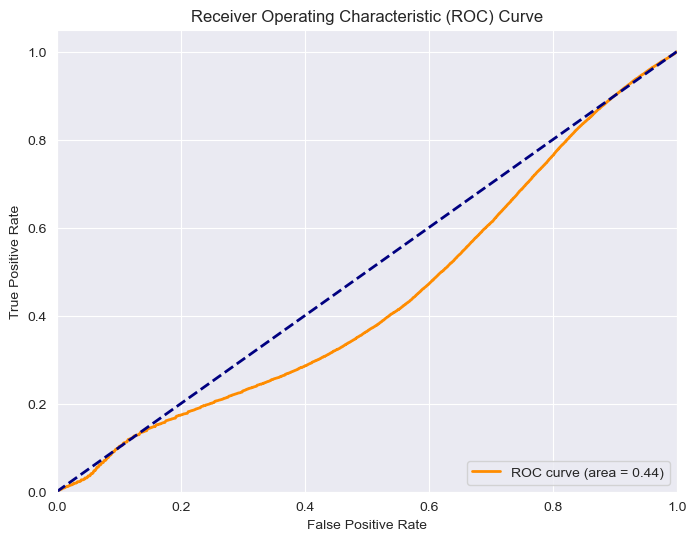

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 第一次调参
param_grid_1 = {
    'C': [0.1],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
model_1 = LogisticRegression()
grid_search_1 = GridSearchCV(model_1, param_grid_1, cv=5, scoring='roc_auc')
grid_search_1.fit(X_train, y_train)
best_model_1 = grid_search_1.best_estimator_
y_score_1 = best_model_1.predict_proba(X_test)[:, 1]
fpr_1, tpr_1, _ = roc_curve(y_test, y_score_1)
auc_1 = auc(fpr_1, tpr_1)
print(f"第一次调参 - AUC: {auc_1}")

# 第二次调参
param_grid_2 = {
    'C': [1],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
model_2 = LogisticRegression()
grid_search_2 = GridSearchCV(model_2, param_grid_2, cv=5, scoring='roc_auc')
grid_search_2.fit(X_train, y_train)
best_model_2 = grid_search_2.best_estimator_
y_score_2 = best_model_2.predict_proba(X_test)[:, 1]
fpr_2, tpr_2, _ = roc_curve(y_test, y_score_2)
auc_2 = auc(fpr_2, tpr_2)
print(f"第二次调参 - AUC: {auc_2}")

# 第三次调参
param_grid_3 = {
    'C': [10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
model_3 = LogisticRegression()
grid_search_3 = GridSearchCV(model_3, param_grid_3, cv=5, scoring='roc_auc')
grid_search_3.fit(X_train, y_train)
best_model_3 = grid_search_3.best_estimator_
y_score_3 = best_model_3.predict_proba(X_test)[:, 1]
fpr_3, tpr_3, _ = roc_curve(y_test, y_score_3)
auc_3 = auc(fpr_3, tpr_3)
print(f"第三次调参 - AUC: {auc_3}")

# 选择最优模型
auc_scores = [auc_1, auc_2, auc_3]
best_index = np.argmax(auc_scores)
if best_index == 0:
    best_fpr, best_tpr, best_auc = fpr_1, tpr_1, auc_1
elif best_index == 1:
    best_fpr, best_tpr, best_auc = fpr_2, tpr_2, auc_2
else:
    best_fpr, best_tpr, best_auc = fpr_3, tpr_3, auc_3

# 绘制AUC曲线
plt.figure(figsize=(8, 6))
plt.plot(best_fpr, best_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {best_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

AUC: 0.8443625538109101


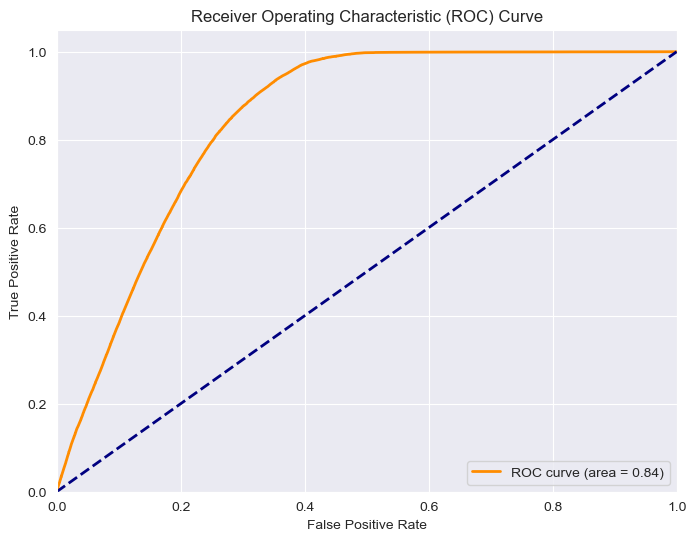

In [59]:

from sklearn.ensemble import RandomForestClassifier
# 第一次调参
n_estimators_list_1 = [100, 200, 300]
max_depth_list_1 = [10, 20, 30, None]
min_samples_split_list_1 = [2, 5, 10]

best_auc_1 = 0
best_params_1 = {}

for n_estimators in n_estimators_list_1:
    for max_depth in max_depth_list_1:
        for min_samples_split in min_samples_split_list_1:
            model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_score = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            current_auc = auc(fpr, tpr)
            if current_auc > best_auc_1:
                best_auc_1 = current_auc
                best_params_1 = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split
                }

print(f"第一次调参 - 最优 AUC: {best_auc_1}")
print(f"第一次调参 - 最优参数: {best_params_1}")


# 第二次调参，根据第一次结果调整参数范围
# 第一次 n_estimators 为 200 最好，max_depth 为 20 最好，min_samples_split 为 5 最好  auc 到 0.80
n_estimators_list_2 = [150, 200, 250]
max_depth_list_2 = [15, 20, 25]
min_samples_split_list_2 = [3, 5, 7]

best_auc_2 = 0
best_params_2 = {}

for n_estimators in n_estimators_list_2:
    for max_depth in max_depth_list_2:
        for min_samples_split in min_samples_split_list_2:
            model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_score = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            current_auc = auc(fpr, tpr)
            if current_auc > best_auc_2:
                best_auc_2 = current_auc
                best_params_2 = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split
                }

print(f"第二次调参 - 最优 AUC: {best_auc_2}")
print(f"第二次调参 - 最优参数: {best_params_2}")  


# 第三次调参，根据第二次结果进一步调整参数范围
# 第二次 n_estimators 为 250 最好，max_depth 为 25 最好，min_samples_split 为 5 最好 -- 到了 0.82
n_estimators_list_3 = [225, 250, 275]
max_depth_list_3 = [22, 25, 28]
min_samples_split_list_3 = [4, 5, 6]

best_auc_3 = 0
best_params_3 = {}

for n_estimators in n_estimators_list_3:
    for max_depth in max_depth_list_3:
        for min_samples_split in min_samples_split_list_3:
            model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_score = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            current_auc = auc(fpr, tpr)
            if current_auc > best_auc_3:
                best_auc_3 = current_auc
                best_params_3 = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split
                }

print(f"第三次调参 - 最优 AUC: {best_auc_3}")
print(f"第三次调参 - 最优参数: {best_params_3}")  #-----到了0.84
# 第三次 n_estimators 为 250 最好，max_depth 为 28 最好，min_samples_split 为 5 最好 -- 到了 0.84

# 选择最优模型
auc_scores = [best_auc_1, best_auc_2, best_auc_3]
best_index = np.argmax(auc_scores)
if best_index == 0:
    best_auc = best_auc_1
    best_params = best_params_1
elif best_index == 1:
    best_auc = best_auc_2
    best_params = best_params_2
else:
    best_auc = best_auc_3
    best_params = best_params_3

print(f"最终最优 AUC: {best_auc}")
print(f"最终最优参数: {best_params}")

# 绘制 AUC 曲线
model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {best_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

NameError: name 'X_train' is not defined